## Install dependencies and import them into jupyter file

--> use pip to install matplotlib, cv2, tensorflow

In [17]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

--> code to convert blue image to normal

In [55]:
def bgrtorgb(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

## Loading MoveNet Model

--> download required model from https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3, we are using TFLite singlepose lightning model

In [18]:
interpreter =   tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

## Making detections using webcam

In [57]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #reshape image as the required input
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_img = tf.cast(img, dtype=tf.float32)
    
    #setup input and output to work tflite interpreter
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #make predictions
    interpreter.set_tensor(input_details[0]['index'], np.array(input_img))
    interpreter.invoke()  #makes predictions
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)

    cv2.imshow('MoveNet Lightning for getting initial frame', frame)

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[[0.52902865 0.47399926 0.6208095 ]
   [0.4753555  0.53497505 0.6568445 ]
   [0.47577843 0.4143717  0.5880718 ]
   [0.52464473 0.6000731  0.48972553]
   [0.5268383  0.34162924 0.74948275]
   [0.78828806 0.77952003 0.74853516]
   [0.74850035 0.19788313 0.78884757]
   [0.9291579  0.8624264  0.02769269]
   [0.9355258  0.08726217 0.0191173 ]
   [0.81918275 0.628183   0.00775045]
   [0.82311654 0.29914942 0.00687621]
   [0.44826823 0.69775236 0.01761665]
   [0.44233102 0.32108694 0.01832361]
   [0.84463733 0.8326959  0.00462729]
   [0.75412405 0.16289057 0.02248441]
   [0.49657983 0.6594945  0.00758789]
   [0.526394   0.3028394  0.00788763]]]]
[[[[0.5302528  0.47150573 0.6911994 ]
   [0.4763177  0.5326309  0.6960579 ]
   [0.47635028 0.41153476 0.6244587 ]
   [0.520169   0.59854686 0.6592586 ]
   [0.52441955 0.34138736 0.72390324]
   [0.7904703  0.78039694 0.75756246]
   [0.74919814 0.19648978 0.7926564 ]
   [0.9290072  0.8629879  0.0297916 ]
   [0.93264055 0.10965201 0.01911434]
   [0.703

In [58]:
keypoints_with_scores

array([[[[0.52106863, 0.5202541 , 0.48503813],
         [0.45359072, 0.5920683 , 0.7154014 ],
         [0.44918284, 0.43650383, 0.7015408 ],
         [0.50759876, 0.65465367, 0.7930409 ],
         [0.51313585, 0.34602964, 0.76552224],
         [0.7861933 , 0.8603014 , 0.61586785],
         [0.78544873, 0.16828567, 0.7087411 ],
         [0.95137423, 0.9623779 , 0.03074238],
         [0.9520149 , 0.09009232, 0.02231145],
         [0.80106723, 0.6971458 , 0.00578546],
         [0.8206681 , 0.36253113, 0.00380985],
         [1.0174354 , 0.8928683 , 0.00928433],
         [0.38818842, 0.29035425, 0.01352049],
         [0.8373353 , 0.92851824, 0.01518869],
         [0.78957283, 0.13840123, 0.02865872],
         [0.47990415, 0.6866669 , 0.01918947],
         [0.52350336, 0.31202397, 0.00398329]]]], dtype=float32)

In [59]:
keypoints_with_scores.shape

(1, 1, 17, 3)

In [60]:
keypoints_with_scores[0][0]  #provides landmarks of 17 points [x,y,confidence]

array([[0.52106863, 0.5202541 , 0.48503813],
       [0.45359072, 0.5920683 , 0.7154014 ],
       [0.44918284, 0.43650383, 0.7015408 ],
       [0.50759876, 0.65465367, 0.7930409 ],
       [0.51313585, 0.34602964, 0.76552224],
       [0.7861933 , 0.8603014 , 0.61586785],
       [0.78544873, 0.16828567, 0.7087411 ],
       [0.95137423, 0.9623779 , 0.03074238],
       [0.9520149 , 0.09009232, 0.02231145],
       [0.80106723, 0.6971458 , 0.00578546],
       [0.8206681 , 0.36253113, 0.00380985],
       [1.0174354 , 0.8928683 , 0.00928433],
       [0.38818842, 0.29035425, 0.01352049],
       [0.8373353 , 0.92851824, 0.01518869],
       [0.78957283, 0.13840123, 0.02865872],
       [0.47990415, 0.6866669 , 0.01918947],
       [0.52350336, 0.31202397, 0.00398329]], dtype=float32)

(0,16) = nose, left eye, right eye, left ear, right ear, left shoulder, right shoulder, left elbow, right elbow, left wrist, right wrist, left hip, right hip, left knee, right knee, left ankle, right ankle

In [61]:
print('right eye coordinates are: ', keypoints_with_scores[0][0][2])  #normalised coordinates

right eye coordinates are:  [0.44918284 0.43650383 0.7015408 ]


In [62]:
right_eye = keypoints_with_scores[0][0][2]
right_eye[:2]*[480,640]  #actual coordinates on the image

array([215.60776234, 279.36244965])

In [63]:
print('right eye PIXEL coordinates are: ', np.array(right_eye[:2]*[480,640]).astype(int))  #normalised coordinates

right eye PIXEL coordinates are:  [215 279]


In [64]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

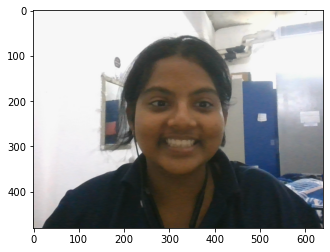

In [66]:
img = frame.copy()
plt.imshow(bgrtorgb(img))

## Drawing keypoints

In [15]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1])) #extracts pixel coordinates
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) #x,y,size,color,fillcolor

In [67]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #reshape image as the required input
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_img = tf.cast(img, dtype=tf.float32)
    
    #setup input and output to work tflite interpreter
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #make predictions
    interpreter.set_tensor(input_details[0]['index'], np.array(input_img))
    interpreter.invoke()  #makes predictions
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])

    draw_keypoints(frame, keypoints_with_scores, 0.4)

    cv2.imshow('MoveNet Lightning with dots for keypoints', frame)

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

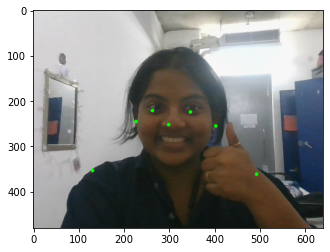

In [68]:
img = frame.copy()
plt.imshow(bgrtorgb(img))

## Drawing edges

--> dict explaining/mapping which coordinate is connected to which

In [31]:
EDGES = {
    (0, 1): 'm',  #(nose, left eye)
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',  #(right shoulder, right elbow)
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'  #(right knee, right ankle)
}

demo of what we are doing in the function

In [35]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [36]:
for edge, color in EDGES.items():
    p1,p2 = edge
    y1,x1,c1 = shaped[p1]
    y2,x2,c2 = shaped[p2]
    print(y1,x1,c1,y2,x2,c2)

222.49889373779297 285.22037506103516 0.561173677444458 188.5550022125244 334.21329498291016 0.6174144744873047
222.49889373779297 285.22037506103516 0.561173677444458 189.73600387573242 243.4370231628418 0.6335335969924927
188.5550022125244 334.21329498291016 0.6174144744873047 212.6319122314453 395.0188446044922 0.6333208084106445
189.73600387573242 243.4370231628418 0.6335335969924927 209.57130432128906 208.52800369262695 0.6344396471977234
222.49889373779297 285.22037506103516 0.561173677444458 296.3125991821289 484.65831756591797 0.6507482528686523
222.49889373779297 285.22037506103516 0.561173677444458 312.1626377105713 131.0682487487793 0.608440101146698
296.3125991821289 484.65831756591797 0.6507482528686523 410.7953453063965 567.9306030273438 0.0356551893055439
410.7953453063965 567.9306030273438 0.0356551893055439 339.8214054107666 407.04833984375 0.006016092374920845
312.1626377105713 131.0682487487793 0.608440101146698 399.0571403503418 7.118721008300781 0.08999384939670563

In [32]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2) #frame,1st coord,2nd coord,color,wdith 

In [39]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #reshape image as the required input
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_img = tf.cast(img, dtype=tf.float32)
    
    #setup input and output to work tflite interpreter
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #make predictions
    interpreter.set_tensor(input_details[0]['index'], np.array(input_img))
    interpreter.invoke()  #makes predictions
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])

    #rendering
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)

    cv2.imshow('MoveNet Lightning with dots for keypoints', frame)

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

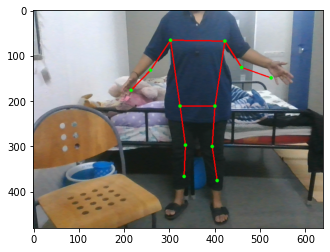

In [56]:
img = frame.copy()
plt.imshow(bgrtorgb(img))